# Checking docker setup

## loading needed packages

In [1]:
import tensorflow as tf
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split, KFold
import sklearn.metrics as metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

Using TensorFlow backend.


In [ ]:
# start auto-reloading certain libraries marked with %aimport
%load_ext autoreload
%autoreload 1
# add new source file to auto-reload
%aimport ..src._funcs_
# add function from auto-reloading module
from src._funcs_ import func

## Testing out psycopg2

In [1]:
from psycopg2 import connect

In [2]:
conn = connect(user='postgres', host='pg_serv')

In [3]:
conn_train = connect(dbname='train2017', user='postgres', host='pg_serv')

In [4]:
conn_val = connect(dbname='val2017', user='postgres', host='pg_serv')

In [6]:
import argparse

## Loading up PostgreSQL

In [3]:
import sys; sys.path.append('../src')
from data_pipeline import BuildDatabase, QueryDatabase

In [4]:
train_args = {'dataset':'train2017', 'host':'pg_serv', 'user':'postgres', 'data_dir':'../data/coco/'}

In [4]:
build_trainset = BuildDatabase(**train_args)

Connecting to PostgreSQL server....
	Connected.


In [ ]:
build_trainset.create_tables('../src/coco_dataset.sql')

In [5]:
build_trainset.build_sql()

Building Database...
Loading COCO dataset train2017 information....
Loading annotations into database...
	annotations COPIED.
	COMMITED.
Loading images into database...
	images COPIED.
	COMMITED.
Loading categories into database...
	categories COPIED.
	COMMITED.
Loading licenses into database...
	licenses COPIED.
	COMMITED.
Finished building database.


In [2]:
val_args = {'dataset':'val2017', 'host':'pg_serv', 'user':'postgres', 'data_dir':'../data/coco/'}

In [ ]:
[*i]

In [6]:
build_valset = BuildDatabase(**val_args)
build_valset.create_tables('../src/coco_dataset.sql')
build_valset.build_sql()

Connecting to PostgreSQL server....
	Connected.
Running ../src/coco_dataset.sql...
Executing SQL...
	Done.
	Commited.
Building Database...
Loading COCO dataset val2017 information....
Loading annotations into database...
	annotations COPIED.
	COMMITED.
Loading images into database...
	images COPIED.
	COMMITED.
Loading categories into database...
	categories COPIED.
	COMMITED.
Loading licenses into database...
	licenses COPIED.
	COMMITED.
Finished building database.


In [9]:
del build_trainset
del build_valset

In [12]:
qbd = QueryDatabase(**train_args)

Connecting to PostgreSQL server....
	Connected.


In [15]:
qbd.query_database('''
SELECT *
FROM images
;
''')

In [17]:
qbd.df_query

,id,file_name,coco_url,flickr_url,local_path,height,width,date_captured,license
0,391895,000000391895.jpg,http://images.cocodataset.org/train2017/000000...,http://farm9.staticflickr.com/8186/8119368305_...,../data/coco/train2017/000000391895.jpg,360,640,2013-11-14 11:18:45,3
1,522418,000000522418.jpg,http://images.cocodataset.org/train2017/000000...,http://farm1.staticflickr.com/1/127244861_ab0c...,../data/coco/train2017/000000522418.jpg,480,640,2013-11-14 11:38:44,4
2,184613,000000184613.jpg,http://images.cocodataset.org/train2017/000000...,http://farm3.staticflickr.com/2169/2118578392_...,../data/coco/train2017/000000184613.jpg,336,500,2013-11-14 12:36:29,3
3,318219,000000318219.jpg,http://images.cocodataset.org/train2017/000000...,http://farm5.staticflickr.com/4125/5094763076_...,../data/coco/train2017/000000318219.jpg,640,556,2013-11-14 13:02:53,3
4,554625,000000554625.jpg,http://images.cocodataset.org/train2017/000000...,http://farm5.staticflickr.com/4086/5094162993_...,../data/coco/train2017/000000554625.jpg,640,426,2013-11-14 16:03:19,3
5,574769,000000574769.jpg,http://images.cocodataset.org/train2017/000000...,http://farm8.staticflickr.com/7010/6728227647_...,../data/coco/train2017/000000574769.jpg,640,480,2013-11-14 17:07:59,3
6,60623,000000060623.jpg,http://images.cocodataset.org/train2017/000000...,http://farm7.staticflickr.com/6080/6113512699_...,../data/coco/train2017/000000060623.jpg,427,640,2013-11-14 17:24:15,4
7,309022,000000309022.jpg,http://images.cocodataset.org/train2017/000000...,http://farm4.staticflickr.com/3790/10167396295...,../data/coco/train2017/000000309022.jpg,480,640,2013-11-14 17:28:23,2
8,5802,000000005802.jpg,http://images.cocodataset.org/train2017/000000...,http://farm4.staticflickr.com/3810/9614287841_...,../data/coco/train2017/000000005802.jpg,479,640,2013-11-14 17:28:25,2
9,222564,000000222564.jpg,http://images.cocodataset.org/train2017/000000...,http://farm8.staticflickr.com/7390/10166966765...,../data/coco/train2017/000000222564.jpg,480,640,2013-11-14 17:30:34,2


### Create view for street context images

In [15]:
views = '''
-- Create quick view tables for street-context annotations and images


BEGIN;

DROP VIEW IF EXISTS street_images;
DROP VIEW IF EXISTS street_annotations;


CREATE VIEW street_annotations AS
    (SELECT
      an.image_id as image_id,
      cat.name as category,
      an.id as annotation_id,
      an.bbox as bbox
    FROM
      annotations as an
    JOIN
        categories as cat
      ON
        an.category_id = cat.id
    AND
        cat.supercategory
      IN ('vehicle', 'outdoor')
    AND
        cat.name
      NOT IN ('airplane', 'train', 'boat'))
;


CREATE VIEW street_images AS (
    SELECT
        DISTINCT image_id,
        img.file_name as file_name,
        img.coco_url as coco_url,
        img.local_path as local_path
    FROM
        street_annotations
    JOIN
            images as img
        ON
            image_id = img.id
);


COMMIT;

'''

In [16]:
qbd.connxn.rollback()
qbd.query_database(views)

ProgrammingError: no results to fetch

In [33]:
qbd.query_database('''
SELECT 
    image_id, 
    category,
    local_path
FROM
    street_images
''')
qbd.df_query.head()

,image_id,category,local_path
0,64,car,../data/coco/train2017/000000000064.jpg
1,64,stop sign,../data/coco/train2017/000000000064.jpg
2,64,truck,../data/coco/train2017/000000000064.jpg
3,71,car,../data/coco/train2017/000000000071.jpg
4,71,car,../data/coco/train2017/000000000071.jpg


### load data

In [2]:
%load_ext autoreload
%autoreload 1
%aimport trafficlight_data

In [7]:
from trafficlight_data import load_binary_train
X, y = load_binary_train(**train_args)

Connecting to PostgreSQL server....
	Connected.


In [8]:
X.head()

,category,bbox,file_name,coco_url,local_path
image_id,,,,,
64,car,"[b'[', b' ', b'5', b'2', b'.', b'3', b'6', b' ...",000000000064.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000064.jpg
64,stop sign,"[b'[', b'1', b'1', b'5', b'.', b'8', b'4', b' ...",000000000064.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000064.jpg
64,truck,"[b'[', b' ', b'5', b'2', b'.', b'6', b'4', b' ...",000000000064.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000064.jpg
71,car,"[b'[', b'3', b'4', b'8', b'.', b'7', b'9', b' ...",000000000071.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000071.jpg
71,car,"[b'[', b'3', b'6', b'6', b'.', b'6', b'9', b' ...",000000000071.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000071.jpg


In [11]:
len(y), y.sum()

(26892, 4139)

## Testing out the image processor class

In [4]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
from skimage.io import imshow, imsave

In [2]:
from trafficlight_data import load_binary_train
train_args = {'dataset':'train2017', 'host':'pg_serv', 'user':'postgres', 'data_dir':'../data/coco/'}
X, y = load_binary_train(**train_args)

Connecting to PostgreSQL server....
	Connected.


In [84]:
from image_processing import ImageProcessor
imgProc = ImageProcessor(X.local_path.head(20))
imgProc.resize_imgs((100,100,3))

In [9]:
images = imgProc.images
images.head()

image_id
64    [[[0.4216862745098022, 0.40219607843137084, 0....
71    [[[0.3606705882352897, 0.48859215686273916, 0....
73    [[[0.6243235294117682, 0.6361862745098078, 0.6...
74    [[[0.11541176470588037, 0.07882352941176324, 0...
86    [[[0.0, 0.5295686274509804, 0.0], [0.0, 0.7558...
Name: local_path, dtype: object

In [10]:
images.apply(lambda img: np.array(img).shape)

image_id
64     (100, 100, 3)
71     (100, 100, 3)
73     (100, 100, 3)
74     (100, 100, 3)
86     (100, 100, 3)
94     (100, 100, 3)
109    (100, 100, 3)
127    (100, 100, 3)
149    (100, 100, 3)
151    (100, 100, 3)
247    (100, 100, 3)
257    (100, 100, 3)
260    (100, 100, 3)
307    (100, 100, 3)
328    (100, 100, 3)
359    (100, 100, 3)
419    (100, 100, 3)
471    (100, 100, 3)
510    (100, 100, 3)
529    (100, 100, 3)
Name: local_path, dtype: object

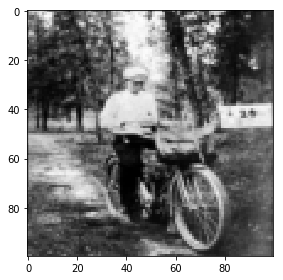

In [6]:
imshow(images[86])

In [18]:
np.array(images.to_list()).shape

(20, 100, 100, 3)

In [39]:
X.join(y)

,file_name,coco_url,local_path,category
image_id,,,,
64,000000000064.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000064.jpg,0
71,000000000071.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000071.jpg,0
73,000000000073.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000073.jpg,0
74,000000000074.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000074.jpg,0
86,000000000086.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000086.jpg,0
94,000000000094.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000094.jpg,0
109,000000000109.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000109.jpg,0
127,000000000127.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000127.jpg,0
149,000000000149.jpg,http://images.cocodataset.org/train2017/000000...,../data/coco/train2017/000000000149.jpg,0


## Looking through the images

In [87]:
from image_processing import ImageProcessor
idxs = np.random.choice(X.local_path.index, size=200)
imgProc = ImageProcessor(X.loc[idxs, 'local_path'])
imgProc.load_imgs()
images = imgProc.images
is_tl = y[idxs]==1

In [127]:
img_it = iter(images[is_tl])

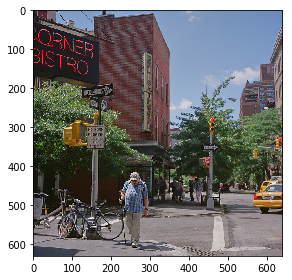

In [265]:
img = next(img_it)
imshow(img)

In [129]:
nimg_it = iter(images[~is_tl])

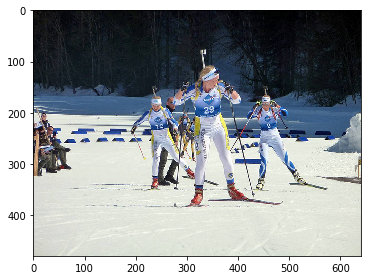

In [234]:
nimg = next(nimg_it)
imshow(next(img_n))

In [266]:
imsave('../images/traffic_light_4.png', img)

## ImageGenerator testing

In [25]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import sys
sys.path.append('../src')
from trafficlight_data import load_binary_train

Using TensorFlow backend.


In [26]:
train_args = {'dataset':'train2017', 'host':'pg_serv', 'user':'postgres', 'data_dir':'../data/coco/'}
X, y = load_binary_train(**train_args)

Connecting to PostgreSQL server....
	Connected.


In [ ]:
label = ('not_tl','traffic_light')
y_label = y.apply(lambda i: label[1] if i == 1 else label[0])
df = X.join(y_label)
datagen = ImageDataGenerator()
target_size = (100,100)
batch_size = 128
seed = 1337
gen_ops = {
        'x_col': 'local_path',
        'y_col': 'category',
        'target_size': target_size,
        'color_mode': 'rgb',
        'class_mode': 'binary',
        'batch_size': batch_size,
        'seed': seed,
    }

In [35]:
generator = datagen.flow_from_dataframe(
                        df,
                        # subset='validation',
                        **gen_ops
                        )

Found 26892 images belonging to 2 classes.


In [38]:
generator.classes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
